In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [4]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

There are some nulls in the samples, which are best addressed if imputed with median or mean values. Since these are not continuous data I would think mean is out of the question. A Median however I think keeps the central tendency the same without skewing the data unlike mode.

In [5]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [6]:
#List of columns to be imputed
df.fillna(df.median(), inplace=True)
df.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

In [7]:
#Dropping idno..which is not useful
df.drop('idno', axis=1, inplace=True)

##  Challenge
### In this dataset, the same participants answered questions in 2012 and again 2014.

#### 1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

First we need to decide we should go for parametric or non-parametric test. This can be decided based on normality test by using Shapiro-Wilk test statistic, W and visualization by histograms.

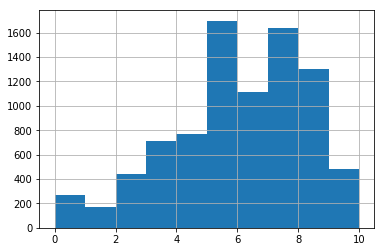

In [8]:
df.ppltrst.hist()
plt.show()

In [9]:
stats.shapiro(df.ppltrst)

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9556652307510376, 4.203895392974451e-45)

The test statistic W shows that it is closer to 1, which means it is normally distributed...But since the shapiro test is sensitive to samples greater than 5000 the pvalue cannot be trusted.
so we can go ahead with parametric test...and moreover the hist plot shows a near normal distribution.

In [10]:
stats.shapiro(np.random.normal(0, 1, 8000))

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9998215436935425, 0.7967125773429871)

Null Hypothesis: There is no effect in the trust of people between 2012 and 2014.

In [11]:
# Paired t-test
stats.ttest_rel(df[df['year']==6].ppltrst,df[df['year']==7].ppltrst)

Ttest_relResult(statistic=0.1513281783069418, pvalue=0.8797239474781277)

Since, the p value is higher than 0.05 we fail to reject the null-hypothesis of no effect and accept that there is no statistically significant difference in the two groups.

Let us now confirm if there is really an difference in numbers from 2012 to 2014 or which can be known by looking at mean or median.

In [12]:
df[df['year']==6].ppltrst.mean()

5.564114498487316

In [13]:
df[df['year']==7].ppltrst.mean()

5.557132883407029

conclusion: No significant change in the people trust has been observed from 2012 to 2014 in general. Now let us see country wise.

In [14]:
df['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [15]:
#paired T-test
for name in df['cntry'].unique():
    print (' %s Country-wise result--%s' % (name,stats.ttest_rel(df[(df['year']==6) & (df['cntry'] == name)].ppltrst, df[(df['year']==7) & (df['cntry'] == name)].ppltrst)))

 CH Country-wise result--Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
 CZ Country-wise result--Ttest_relResult(statistic=-0.3505247744198508, pvalue=0.7260572552300646)
 DE Country-wise result--Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)
 ES Country-wise result--Ttest_relResult(statistic=2.4654605168309875, pvalue=0.013821475296285565)
 NO Country-wise result--Ttest_relResult(statistic=0.536083058309722, pvalue=0.5920644526109955)
 SE Country-wise result--Ttest_relResult(statistic=-2.077952635366614, pvalue=0.037994493452976834)


Conclusion:
Based on the p values except for countries 'ES' and 'SE' there is no difference in people trust between 2012 and 2014 years. Even those there is border line significance. Now let us see if it has decreased or increased.

In [16]:
df[(df['year']==6) & (df['cntry'] == 'ES')].ppltrst.mean()

5.114591920857379

In [17]:
df[(df['year']==7) & (df['cntry'] == 'ES')].ppltrst.mean()

4.896949711459192

It can be concluded that there is a trend for decrease (borderline) in the people trust in 'ES' from 2012 to 2014

In [18]:
df[(df['year']==6) & (df['cntry'] == 'SE')].ppltrst.mean()

6.058370044052864

In [19]:
df[(df['year']==7) & (df['cntry'] == 'SE')].ppltrst.mean()

6.257709251101321

But here there is no decrease and actually there is an increase (borderline) in the people trust in 'SE' from 2012 to 2014

##  Challenge
### In this dataset, the same participants answered questions in 2012 and again 2014.

#### 2) Did people become happier from 2012 to 2014? Compute results for each country in the sample.

First we need to decide we should go for parametric or non-parametric test. This can be decided based on normality test by using Shapiro-Wilk test statistic, W and visualization by histograms.

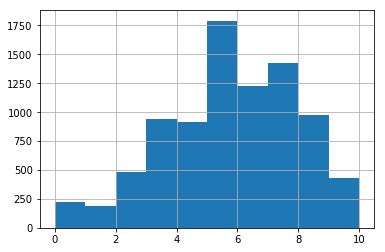

In [20]:
df.pplhlp.hist()
plt.show()

In [21]:
stats.shapiro(df.pplhlp)

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9694225192070007, 3.265948877564814e-39)

The test statistic W shows that it is closer to 1, which means it is normally distributed...But since the shapiro test is sensitive to samples greater than 5000 the pvalue cannot be trusted.
so we can go ahead with parametric test...and moreover the hist plot shows a near normal distribution.

In [22]:
stats.shapiro(np.random.normal(0, 1, 8000))

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9997491836547852, 0.4698294699192047)

Null Hypothesis: There is no effect in the happiness of people between 2012 and 2014.

In [23]:
# Paired t-test
stats.ttest_rel(df[df['year']==6].pplhlp,df[df['year']==7].pplhlp)

Ttest_relResult(statistic=3.093805766100971, pvalue=0.0019887670871192985)

Since, the p value is lesser than 0.05 we reject the null-hypothesis of no effect and accept that there is  statistically significant difference/effect in the two groups.

Let us now confirm if there is really an difference in numbers from 2012 to 2014 or which can be known by looking at mean or median.

In [24]:
df[df['year']==6].pplhlp.mean()

5.387479636956016

In [25]:
df[df['year']==7].pplhlp.mean()

5.250407260879683

conclusion: Significant change  observed in the people happiness has been observed from 2012 to 2014 in general. Now let us see country wise.

In [26]:
df['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [27]:
#paired T-test
for name in df['cntry'].unique():
    print (' %s Country-wise result--%s' % (name,stats.ttest_rel(df[(df['year']==6) & (df['cntry'] == name)].pplhlp, df[(df['year']==7) & (df['cntry'] == name)].pplhlp)))

 CH Country-wise result--Ttest_relResult(statistic=0.5224395683099706, pvalue=0.6015141944393361)
 CZ Country-wise result--Ttest_relResult(statistic=0.3300299065534215, pvalue=0.7414825673637138)
 DE Country-wise result--Ttest_relResult(statistic=-0.9645815129007093, pvalue=0.35235583457414754)
 ES Country-wise result--Ttest_relResult(statistic=4.634916991303744, pvalue=3.957094217693562e-06)
 NO Country-wise result--Ttest_relResult(statistic=0.8617911439609637, pvalue=0.38908545047034737)
 SE Country-wise result--Ttest_relResult(statistic=-0.4775670097064511, pvalue=0.6330734785217813)


Conclusion:
Based on the p values except for country 'ES' since the p vlaues are greater than 0.05 we fail to reject null-hypothesis of no effect and accept that there is no difference in people happiness between 2012 and 2014 years. For 'ES' country there is a significance. Now let us see if it has decreased or increased.

In [28]:
df[(df['year']==6) & (df['cntry'] == 'ES')].pplhlp.mean()

4.749381698268755

In [29]:
df[(df['year']==7) & (df['cntry'] == 'ES')].pplhlp.mean()

4.328936521022259

It can be concluded that there is a trend for decrease (borderline, since very low differnece in the means) in the people happiness in 'ES' from 2012 to 2014

###  Challenge
### In this dataset, the same participants answered questions in 2012 and again 2014.

#### 3) Who reported watching more TV in 2012, men or women?

First we need to decide we should go for parametric or non-parametric test. This can be decided based on normality test by using Shapiro-Wilk test statistic, W and visualization by histograms.

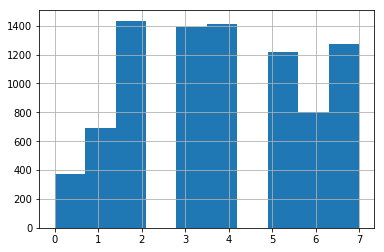

In [30]:
df.tvtot.hist()
plt.show()

In [31]:
stats.shapiro(np.random.normal(0, 1, 8000))

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9997788667678833, 0.6023834943771362)

In [32]:
stats.shapiro(df.tvtot)

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9424682259559631, 0.0)

The test statistic W shows away from 0.999, which means it is not normally distributed...But since the shapiro test is sensitive to samples greater than 5000 the pvalue cannot be trusted.
and we need to rely on visualization..and moreover the hist plot shows nothing near normal distribution. So we may need to do a non-parametric test here.

Null Hypothesis: There is no effect in the number of people watching TV between men and women in 2012.

In [33]:
# Mannwhitney U test canbe done here since it is non parametric and  there are two groups.
stats.mannwhitneyu(df[(df['year']==6) & (df['gndr'] == 1.0)].tvtot,df[(df['year']==6) & (df['gndr'] == 2.0)].tvtot)

MannwhitneyuResult(statistic=2277450.5, pvalue=0.2237635506897072)

Since, the p value is higher than 0.05 we failed to reject the null-hypothesis of no effect and accept null hypthesis that there is no statistically significant difference/effect in the two groups.

Let us now confirm if there is really an difference in numbers between men and women which can be known by looking at mean or median.

In [34]:
ranks = stats.rankdata(df[(df['year']==6) & (df['gndr'] == 1.0)].tvtot.tolist()+
    df[(df['year']==6) & (df['gndr'] == 2.0)].tvtot.tolist())

ranks_1 = ranks[0:(df[(df['year']==6) & (df['gndr'] == 1.0)].tvtot.shape[0])]
ranks_2 = ranks[(df[(df['year']==6) & (df['gndr'] == 1.0)].tvtot.shape[0]):]

In [35]:
np.median(ranks_1) # Women

2248.0

In [36]:
np.median(ranks_2) # Men

2248.0

conclusion: No Significant change  observed in the TV watching between men and women in 2012.

###  Challenge
### In this dataset, the same participants answered questions in 2012 and again 2014.

#### 4) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

First we need to decide we should go for parametric or non-parametric test. This can be decided based on normality test by using Shapiro-Wilk test statistic, W and visualization by histograms.

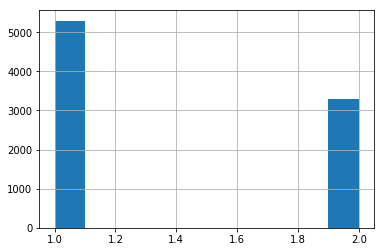

In [37]:
df.partner.hist()
plt.show()

In [38]:
stats.shapiro(np.random.normal(0, 1, 8000))

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9997701048851013, 0.562003493309021)

In [39]:
stats.shapiro(df.partner)

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.616858959197998, 0.0)

The test statistic W shows away from 0.999, which means it is not normally distributed...But since the shapiro test is sensitive to samples greater than 5000 the pvalue cannot be trusted.
and we need to rely on visualization..and the hist plot shows that it definitely not normal and it may be Bernoulli distribution. So going with non-parametric tests.

Null Hypothesis: There is no effect in likeliness to believe people were fair in 2012 from the two groups living with a partner and not living with a partner (people living alone)

In [40]:
# Mannwhitney U test canbe done here since it is non parametric and  there are two groups.
stats.mannwhitneyu(df[(df['year']==6) & (df['partner'] == 1.0)].pplfair,df[(df['year']==6) & (df['gndr'] == 2.0)].pplfair)

MannwhitneyuResult(statistic=2833357.5, pvalue=0.20343862698874376)

Since, the p value is higher than 0.05 we failed to reject the null-hypothesis of no effect and accept that there is no statistically significant difference/effect in the two groups.

Let us now confirm if there is really an difference in numbers between people iving with a partner and people living alone. This can be known by looking at mean or median of the ranks.

In [41]:
ranks = stats.rankdata(df[(df['year']==6) & (df['partner'] == 1.0)].pplfair.tolist()+
    df[(df['year']==6) & (df['partner'] == 2.0)].pplfair.tolist())

ranks_1_0 = ranks[0:(df[(df['year']==6) & (df['partner'] == 1.0)].pplfair.shape[0])]
ranks_2_0 = ranks[(df[(df['year']==6) & (df['partner'] == 1.0)].pplfair.shape[0]):]

In [42]:
np.mean(ranks_1_0) # People living alone

2203.2965311450953

In [43]:
np.mean(ranks_2_0) # People living with partner

2058.920173267327

Since, the means for people living alone was higher in the people fair they are the ones who believe that people are fair than the other group.

conclusion:  People living alone are more likely to believe that people were fair in 2012 than poeple living with partners.

###  Challenge
### In this dataset, the same participants answered questions in 2012 and again 2014.

#### 5) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

First we need to decide we should go for parametric or non-parametric test. This can be decided based on normality test by using Shapiro-Wilk test statistic, W and visualization by histograms.

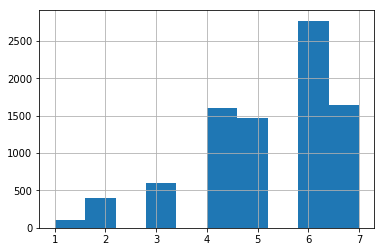

In [44]:
df.sclmeet.hist()
plt.show()

In [45]:
stats.shapiro(np.random.normal(0, 1, 8000))

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9997717142105103, 0.5694034099578857)

In [46]:
stats.shapiro(df.sclmeet)

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9003821611404419, 0.0)

The test statistic W shows away from 0.999, which means it is not normally distributed...But since the shapiro test is sensitive to samples greater than 5000 the pvalue cannot be trusted.
and we need to rely on visualization..and the hist plot shows that it definitely not normal and it may be other distributions. So going with non-parametric tests.

Null Hypothesis: There is no effect or differences in how often people meet in 2012 from the multiple groups i.e from different countries

In [47]:
# checking the number of samples in each group...in order to select 4 groups which has highest sample numbers...
# because more samples better is the analysis
for name in df['cntry'].unique():
    print ("Country-%s- wise sample numbers %d" %(name, df[(df['year']==7) & (df['cntry'] == name)].sclmeet.value_counts().sum()))

Country-CH- wise sample numbers 773
Country-CZ- wise sample numbers 658
Country-DE- wise sample numbers 14
Country-ES- wise sample numbers 1213
Country-NO- wise sample numbers 731
Country-SE- wise sample numbers 908


So selected 'ES', 'SE', 'CH', 'NO' countries since they were high to generate good statistical analysis

In [48]:
# scipy.stats.kruskal Wallace test can be done here since it is non parametric and  there are multiple groups.
stats.kruskal(df[(df['year']==7) & (df['cntry'] == 'ES')].sclmeet,
              df[(df['year']==7) & (df['cntry'] == 'SE')].sclmeet,
               df[(df['year']==7) & (df['cntry'] == 'CH')].sclmeet,
               df[(df['year']==7) & (df['cntry'] == 'NO')].sclmeet)

KruskalResult(statistic=21.07933974707835, pvalue=0.00010135659954283324)

Since, the p value is lower than 0.05 we reject the null-hypothesis of no effect and accept that there is statistically significant difference/effect in the mulitple groups.

Now we need to find out which group is different from what and by what p value. This can be done by finding the ranks from the data and then doing a Tukey HSD(as done for parametric) the difference here is we are doing rank and then doing the Tukey HSD mulitple comparision of means.

In [49]:
# converitng the rating into ranks.

ranks = stats.rankdata(df[(df['year']==7) & (df['cntry'] == 'ES')].sclmeet.tolist()+
                        df[(df['year']==7) & (df['cntry'] == 'SE')].sclmeet.tolist()+
                        df[(df['year']==7) & (df['cntry'] == 'CH')].sclmeet.tolist()+
                        df[(df['year']==7) & (df['cntry'] == 'NO')].sclmeet.tolist())

No_ES = df[(df['year']==7) & (df['cntry'] == 'ES')].sclmeet.shape[0]
No_SE = df[(df['year']==7) & (df['cntry'] == 'SE')].sclmeet.shape[0]
No_CH = df[(df['year']==7) & (df['cntry'] == 'CH')].sclmeet.shape[0]
No_NO = df[(df['year']==7) & (df['cntry'] == 'NO')].sclmeet.shape[0]

ranks_ES = ranks[0 : No_ES]
ranks_SE = ranks[No_ES : No_ES+No_SE]
ranks_CH = ranks[No_ES+No_SE : No_ES+No_SE+No_CH]
ranks_NO = ranks[No_ES+No_SE+No_CH : No_ES+No_SE+No_CH+No_NO]

In [50]:
len(ranks)

3625

In [51]:
np.mean(ranks_ES) # Mean Ranks of social meet for people in country 'ES'

1810.8363561417973

In [52]:
np.mean(ranks_SE) # Mean Ranks of social meet for People in country 'SE'

1919.2560572687225

In [53]:
np.mean(ranks_CH) # Mean Ranks of social meet for People in country 'CH'

1691.3111254851228

In [54]:
np.mean(ranks_NO) # Mean Ranks of social meet for People in country 'NO'

1813.2865937072504

It is hard to tell from the means whether one is more or less...so lets do some pair-wise statistics.

group1,group2,meandiff,lower,upper,reject
CH,ES,119.5252,-0.2026,239.2531,False
CH,NO,121.9755,-12.2396,256.1905,False
CH,SE,227.9449,100.6307,355.2592,True
ES,NO,2.4502,-119.3603,124.2608,False
ES,SE,108.4197,-5.7426,222.582,False
NO,SE,105.9695,-23.3053,235.2442,False


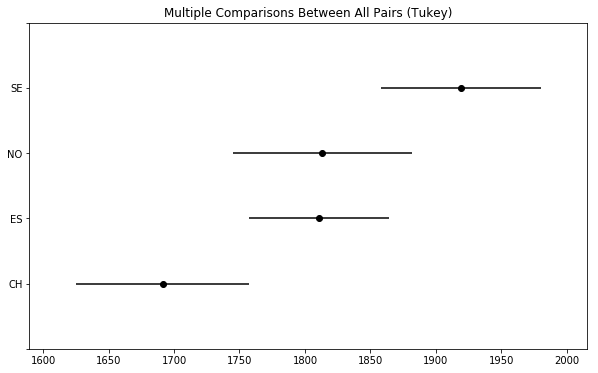

In [55]:
groups=np.array(['ES', 'SE', 'CH', 'NO'])
groups = np.repeat(groups, [No_ES, No_SE, No_CH, No_NO])

#converting the ranks as numpy arrays
ranks_for_tukey = np.asarray(ranks)

tukey = pairwise_tukeyhsd(endog=ranks_for_tukey,      # Data
                          groups=groups,   # Groups
                          alpha=0.05    # Significance level
                      )        
tukey.plot_simultaneous()
tukey.summary()  

The pair wise comparisons of the countries we see almost all countries comparisons the null hypothesis is not rejected expect two country "SE" and "CH". Not Rejecting null hypothesis means there is no significant effect between the groups in people who meet socially in 2014.

The countries that stands out are the "SE" when compared to 'CH' there is  significant difference in people in how often people meet socially in 2014 between these two countries.

Now as additional testing out of curiosity not in assignment....I want to see how conservative is the non-parametric in not allowing false positives. so performed the same Tukey HSD with parametric data and not ranked data.

group1,group2,meandiff,lower,upper,reject
CH,ES,0.0996,-0.0644,0.2637,False
CH,NO,0.1406,-0.0433,0.3245,False
CH,SE,0.2645,0.0901,0.439,True
ES,NO,0.041,-0.1259,0.2079,False
ES,SE,0.1649,0.0084,0.3213,True
NO,SE,0.1239,-0.0533,0.301,False


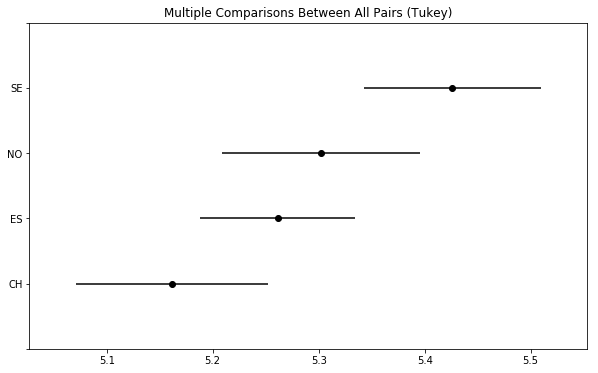

In [56]:
groups=np.array(['ES', 'SE', 'CH', 'NO'])
groups = np.repeat(groups, [No_ES, No_SE, No_CH, No_NO])
#converting the ranks as numpy arrays
data_for_tukey = np.asarray(df[(df['year']==7) & (df['cntry'] == 'ES')].sclmeet.tolist()+
                        df[(df['year']==7) & (df['cntry'] == 'SE')].sclmeet.tolist()+
                        df[(df['year']==7) & (df['cntry'] == 'CH')].sclmeet.tolist()+
                        df[(df['year']==7) & (df['cntry'] == 'NO')].sclmeet.tolist())

tukey = pairwise_tukeyhsd(endog=data_for_tukey,      # Data
                          groups=groups,   # Groups
                          alpha=0.05)         # Significance level

tukey.plot_simultaneous()
tukey.summary()  

In comparison to the previous tukey result we see that one more null hypthesis is reject i.e ES and SE i.e being less conservative as expected, since here we are considering the means of the data...where less differences can be detected and that is why null hypothesis is rejected and we signficant differences between groups.

###  Challenge
### In this dataset, the same participants answered questions in 2012 and again 2014.

#### 6) Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

First we need to decide we should go for parametric or non-parametric test. This can be decided based on normality test by using Shapiro-Wilk test statistic, W and visualization by histograms.

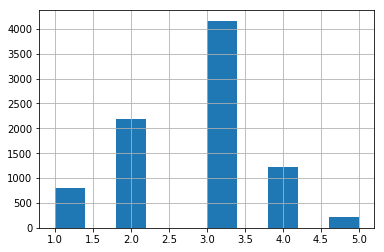

In [57]:
df.sclact.hist()
plt.show()

In [58]:
stats.shapiro(np.random.normal(0, 1, 8000))

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9998722076416016, 0.9571016430854797)

In [59]:
stats.shapiro(df.sclact)

C:\Users\nagad\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8844683766365051, 0.0)

The test statistic W shows away from 0.999, which means it is not normally distributed...But since the shapiro test is sensitive to samples greater than 5000 the pvalue cannot be trusted.
and we need to rely on visualization..and the hist plot shows that it definitely not normal and it may be other distributions. So going with non-parametric tests.

Null Hypothesis: There is no effect or differences in how often people took part in social activities relative to others thier age in 2014 , from the multiple groups i.e from different countries

In [60]:
# checking the number of samples in each group...in order to select 4 groups which has highest sample numbers...
# because more samples better is the analysis
for name in df['cntry'].unique():
    print ("Country-%s- wise sample numbers %d" %(name, df[(df['year']==7) & (df['cntry'] == name)].sclmeet.value_counts().sum()))

Country-CH- wise sample numbers 773
Country-CZ- wise sample numbers 658
Country-DE- wise sample numbers 14
Country-ES- wise sample numbers 1213
Country-NO- wise sample numbers 731
Country-SE- wise sample numbers 908


So selected 'ES', 'SE', 'CH', 'NO' countries since they were high to generate good statistical analysis

In [61]:
# scipy.stats.kruskal Wallace test can be done here since it is non parametric and  there are multiple groups.
stats.kruskal(df[(df['year']==7) & (df['cntry'] == 'ES')].sclact,
              df[(df['year']==7) & (df['cntry'] == 'SE')].sclact,
               df[(df['year']==7) & (df['cntry'] == 'CH')].sclact,
               df[(df['year']==7) & (df['cntry'] == 'NO')].sclact)

KruskalResult(statistic=48.59601316471723, pvalue=1.5901065294174995e-10)

Since, the p value is lower than 0.05 we reject the null-hypothesis of no effect and accept that there is statistically significant difference/effect in the mulitple groups.

Now we need to find out which group is different from what and by what p value. This can be done by finding the ranks from the data and then doing a Tukey HSD(as done for parametric) the difference here is we are doing rank and then doing the Tukey HSD mulitple comparision of means.

In [62]:
# converitng the rating into ranks.

ranks = stats.rankdata(df[(df['year']==7) & (df['cntry'] == 'ES')].sclact.tolist()+
                        df[(df['year']==7) & (df['cntry'] == 'SE')].sclact.tolist()+
                        df[(df['year']==7) & (df['cntry'] == 'CH')].sclact.tolist()+
                        df[(df['year']==7) & (df['cntry'] == 'NO')].sclact.tolist())

No_ES = df[(df['year']==7) & (df['cntry'] == 'ES')].sclact.shape[0]
No_SE = df[(df['year']==7) & (df['cntry'] == 'SE')].sclact.shape[0]
No_CH = df[(df['year']==7) & (df['cntry'] == 'CH')].sclact.shape[0]
No_NO = df[(df['year']==7) & (df['cntry'] == 'NO')].sclact.shape[0]

ranks_ES = ranks[0 : No_ES]
ranks_SE = ranks[No_ES : No_ES+No_SE]
ranks_CH = ranks[No_ES+No_SE : No_ES+No_SE+No_CH]
ranks_NO = ranks[No_ES+No_SE+No_CH : No_ES+No_SE+No_CH+No_NO]

In [63]:
len(ranks)

3625

In [64]:
np.mean(ranks_ES) # Mean Ranks of social meet for people in country 'ES'

1663.8173948887056

In [65]:
np.mean(ranks_SE) # Mean Ranks of social meet for People in country 'SE'

1935.0368942731277

In [66]:
np.mean(ranks_CH) # Mean Ranks of social meet for People in country 'CH'

1819.9346701164295

In [67]:
np.mean(ranks_NO) # Mean Ranks of social meet for People in country 'NO'

1901.6299589603284

It is hard to tell from the means whether one is more or less...so lets do some pair-wise statistics.

group1,group2,meandiff,lower,upper,reject
CH,ES,-156.1173,-270.8452,-41.3893,True
CH,NO,81.6953,-46.9149,210.3054,False
CH,SE,115.1022,-6.8953,237.0997,False
ES,NO,237.8126,121.0889,354.5362,True
ES,SE,271.2195,161.8247,380.6143,True
NO,SE,33.4069,-90.4692,157.2831,False


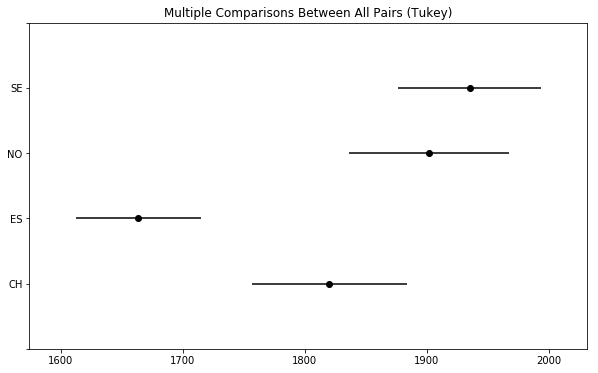

In [68]:
groups=np.array(['ES', 'SE', 'CH', 'NO'])
groups = np.repeat(groups, [No_ES, No_SE, No_CH, No_NO])

#converting the ranks as numpy arrays
ranks_for_tukey = np.asarray(ranks)

tukey = pairwise_tukeyhsd(endog=ranks_for_tukey,      # Data
                          groups=groups,   # Groups
                          alpha=0.05    # Significance level
                      )        
tukey.plot_simultaneous()
tukey.summary()  

From the pair wise comparisons of the countries we see the country "ES" comparisons stand out.

'ES' comparisons with other three countries the null hypothesis is rejected, that means there is  significant effect between the groups in people who did some social activity in 2014.

All other countries comparisons we fail to reject the null hypothesis that means we accept null hypothesis that means there is no significant effect in socially activity between these countries in 2014.